# Исследование компьютерных игр

**Цель исследования** 

Выявить закономерности, определяющие успешность игры.

**Входные данные** 

Из открытых источников доступны исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Заказчик исследования**

Магазин "Стримчик"

**Практическое применение результатов исследования**

Исследование позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.


**Дополнительная информация**

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# <a name="contents"></a> Содержание исследования

## [Знакомство с данными](#stage_1)
   
## [Подготовка данных](#stage_2)

* меняем название столбцов  
* обрабатываем пропущенные значения
* преобразуем типы данных
* подсчитываем суммарные продажи во всех регионах


## [Исследовательский анализ данных](#stage_3)

* смотрим, сколько игр выпускалось в разные года
* исследуем, как менялись продажи по платформам
* определяем акутальный для исследования период
* определяем потенциально прибыльные платформы
* исследуем влияние оценок пользователей и критиков на продажи
* определяем самые прибыльные жанры

## [Составление портрета пользователя каждого региона](#stage_4)

* самые популряные платформы (топ-5) каждого региона
* самые популярные жанры (топ-5) каждого региона
* влияет ли рейтинг ESRB на продажи в отдельном регионе
* найдем десять населенных пунктов с наибольшим количеством объявлений
* вывод по результатам данного этапа

## [Проверка гипотез](#stage_5)
* средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* средние пользовательские рейтинги жанров Action и Sports разные. 

## [Общий вывод](#stage_6)

<a name="stage_1"></a>
# Этап 1. Чтение файла и знакомство с данными

[Наверх к оглавлению](#contents)

In [1]:
# Импортируем библиотеки для проекта
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import factorial
from math import ceil
import datetime
import os
import warnings
warnings.filterwarnings('ignore')

Загрузка файла

In [2]:
df = pd.read_csv('data/games.csv') 

Посмотрим на данные - ссылка на переменную покажет и голову, и хвост датафрейма:

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Всего 16715 строк (наблюдений), 11 столбцов (параметров или признаков, описывающих каждое наблюдение).

**Описание данных согласно документации**


•	Name — название игры

•	Platform — платформа

•	Year_of_Release — год выпуска

•	Genre — жанр игры

•	NA_sales — продажи в Северной Америке (миллионы проданных копий)

•	EU_sales — продажи в Европе (миллионы проданных копий)

•	JP_sales — продажи в Японии (миллионы проданных копий)

•	Other_sales — продажи в других странах (миллионы проданных копий)

•	Critic_Score — оценка критиков (максимум 100)

•	User_Score — оценка пользователей (максимум 10)

•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

Получим общую информацию о данных в датасете:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим, есть ли явные дубликаты:

In [5]:
df.duplicated().sum()

0

Грубых дубликатов нет.

Посмотрим на общую статистическую информацию.

In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Отрицательных значений нет. Минимальный год - 1980 год, а максимальный - 2016 год (это не противоречит данным из документации). 
На первый взгляд не вызывают вопросов и оценки пользователей и критиков - максимум 98.0 и 9.7 (это не противоречит данным из документации).

## Вывод


* В таблице 11 столбцов. Общее количество наблюдений в данных 16715. 

* В 6 столбцах есть пропущенные значения: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. 

* В датафрейме представлены данные двух типов: объекты python (строки) и числа с плавающей точкой.  
    
* В столбце Year_of_Release тип данных число с плавающей точкой - необходимо заменить на объект datetime.

* В столбцах Critic_Score и User_Score по сути одна сущность - оценка, некая количественная характеристика, поэтому нужно привести к одному типу - к дробному числу. 

* В названиях столбцов выявлены нарушения: для удобства работы с данными необходимо привести все к нижнему регистру.

* Грубых дубликатов не выявлено. 

<a name="stage_2"></a>

# Этап 2. Подготовка данных

[Наверх к оглавлению](#contents)

## Замена названий столбцов

In [7]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Неудобно работать с такими названиями: нужно привести все к нижнему регистру.

In [8]:
df.columns = df.columns.str.lower()

Проверяем результат.

In [9]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Обработка пропущенных значений

До преобразования типов данных мы решим проблему пропущенных значений.

Посмотрим на доли пропущенных значений

In [10]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

Количество пропущенный значений

In [11]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Посмотрим на первые 5 строк датафрейма со строками с nan

In [12]:
df[df.isnull().any(1)].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Посмотрим, как распределены пропуски в столбцах с оценками и рейтингом.

In [13]:
len(df[df["critic_score"].isna() & df["user_score"].isna() & df["rating"].isna()])

6621

В 6621 случаях - пропуски в оценках и рейтинге распределены одинаково, но это не все наши пропуски. Пропуски случайные. Возможно, данные утеряны в процессе выгрузки данных или некорректного парсинга сайта, с которого выгружали данные, или данные изначально отсутствовали, например, как данные о пользовательских оценках по некоторым играм.   

Cмотрим на строки с пропущенным жанром

In [14]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


У нас два пропущенных значения в столбце c названием игры и в столбце с жанром и оба пропуска в одной строке. Похоже, данные где-то потерялись при выгрузке. Удалим эти строки. Это мизерный процент.

Также у нас очень маленький процент пропущенных данных в годе релиза - 1.6%. Тоже удалим их. 

In [15]:
df = df.dropna(subset=['name', 'genre', 'year_of_release'])

У нас 50% пропущенных данных в оценках экспертов и 40% пропущенных значений в столбце с оценкой пользователей, рейтингом. 
Довольно много, но заполнить более и менее корректно такие параметры невозможно, это только исказит данные.

In [16]:
# Посмотрим быстро на уникальные значения данных для столбцов ниже:
for column_name in ['critic_score', 'user_score',  'rating']:
    print('Уникальные значения столбца', column_name, '\n')
    print(df[column_name].unique())
    print()

Уникальные значения столбца critic_score 

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]

Уникальные значения столбца user_score 

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

Уникальные 

Мы видим, что в пользовательских оценках есть числа, а есть значение текстовое - tbd (сокр. от to be determined). Поскольку оценка не определена, то есть она неизвестна, мы заменим это значение на пропущенное - NaN.

In [17]:
print('Количество значений tbd в столбце user_score:', len(df[df['user_score'] == 'tbd']))
print('Количество nan значений в столбце user_score до предобработки:', len(df[df['user_score'].isna()]))
df['user_score'] = df['user_score'].replace('tbd', np.nan)
print('Количество nan значений в столбце user_score после замены tbd на nan:', len(df[df['user_score'].isna()]))

Количество значений tbd в столбце user_score: 2376
Количество nan значений в столбце user_score до предобработки: 6605
Количество nan значений в столбце user_score после замены tbd на nan: 8981


Cмотрим, какая в итоге доля пропущенных значений

In [18]:
round(df.user_score.isna().mean(), 1)

0.5

Успешно заменили значения tbd на пропущенные значения. Теперь в столбце user_score 54% пропущенных значений. Будем это иметь в виду.

Мы не можем корректно заполнить пропуски в столбце с годом выпуска, поэтому оставим как есть, тем более там всего 1.6%.

Смотрим на рейтинг: сгруппируем по названию игр, где рейтинг неизвестен.

In [19]:
df[df['rating'].isna()].groupby('name').count().sort_values('platform', ascending=False)

,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
name,,,,,,,,,,
The Amazing Spider-Man 2 (2014),7,7,7,7,7,7,7,0,0,0
FIFA 12,7,7,7,7,7,7,7,0,0,0
FIFA Soccer 07,6,6,6,6,6,6,6,0,0,0
Cars 2,6,6,6,6,6,6,6,0,0,0
Adventure Time: Finn & Jake Investigations,6,6,6,6,6,6,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...
Hyperdimension Neptunia Re;Birth 3,1,1,1,1,1,1,1,0,0,0
Hyperdimension Neptunia Re;Birth 2,1,1,1,1,1,1,1,0,0,0
Hyperdimension Neptunia,1,1,1,1,1,1,1,0,0,0


Посмотрим на несколько таких игр с неизвестным рейтингом - возможно, есть рейтинг у такой игры, созданных для иных платформ.

In [20]:
df[df['name'] == 'FIFA 12']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
122,FIFA 12,PS3,2011.0,Sports,0.84,4.30,0.11,1.39,NaN,NaN,NaN
278,FIFA 12,X360,2011.0,Sports,0.84,2.78,0.02,0.53,NaN,NaN,NaN
2677,FIFA 12,Wii,2011.0,Sports,0.15,0.50,0.00,0.11,NaN,NaN,NaN
3843,FIFA 12,PSP,2011.0,Sports,0.12,0.25,0.02,0.13,NaN,NaN,NaN
4191,FIFA 12,PC,2011.0,Sports,0.04,0.33,0.00,0.10,NaN,NaN,NaN
4902,FIFA 12,3DS,2011.0,Sports,0.08,0.26,0.00,0.05,NaN,NaN,NaN
11237,FIFA 12,PS2,2011.0,Sports,0.00,0.02,0.00,0.06,NaN,NaN,NaN


In [21]:
df[df['name'] == 'The Amazing Spider-Man (Console Version)']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2601,The Amazing Spider-Man (Console Version),PS3,2012.0,Action,0.31,0.35,0.0,0.13,NaN,NaN,NaN
2789,The Amazing Spider-Man (Console Version),X360,2012.0,Action,0.43,0.24,0.0,0.06,NaN,NaN,NaN
7671,The Amazing Spider-Man (Console Version),DS,2012.0,Action,0.15,0.03,0.0,0.01,NaN,NaN,NaN
7732,The Amazing Spider-Man (Console Version),3DS,2012.0,Action,0.15,0.03,0.0,0.01,NaN,NaN,NaN
8792,The Amazing Spider-Man (Console Version),Wii,2012.0,Action,0.10,0.04,0.0,0.01,NaN,NaN,NaN
11182,The Amazing Spider-Man (Console Version),WiiU,2013.0,Action,0.05,0.03,0.0,0.01,NaN,NaN,NaN


Похоже, информации по рейтингу для таких игр нет по всему датафрейму. Заполним такие значения строкой missing

In [22]:
print('Количество пропущенных значений в столбце rating до обработки: ', len(df[df['rating'].isna()]))
df['rating'] = df['rating'].fillna('missing')
print('Количество пропущенных значений в столбце rating после обработки: ', len(df[df['rating'].isna()]))

Количество пропущенных значений в столбце rating до обработки:  6676
Количество пропущенных значений в столбце rating после обработки:  0


Проверяем результат.

In [23]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.546157
rating             0.000000
dtype: float64

### Вывод

В ходе исследования данных были выявлены пропущенные значения в следующих столбцах:
    
  
    1. столбец с названием игры и столбец с жанром (0.012 % от всей выборки, 2 наблюдения)
    
    2. столбец с годом выпуска игры (1.6 % от всей выборки)
    
    3. столбец с оценкой эксперта (51% от всей выборки)
    
    4. столбец с оценкой пользователя (40% от всей выборки)
    
    5. столбец с рейтингом от организации ESRB (40% от всей выборки)

    
Строки с пропущенным названием игры и жанром были удалены. Это всего две строки. Скорее всего, была неудачная выгрузка данных.

Пропуски в столбце с годом выпуска были оставлены: их слишком мало и заполнить корректно не представляется возможным. Это случайные пропуски.

Столбец с оценкой пользователя содержал значением tbd (to be determined), то есть это неопределенные значения, которые мы конвертировали в пропуски. Теперь всего у нас 54% пропущенных значений. довольно много, Но почти столько же пропусков и в оценке экспертов. Скорее всего, данные отсутсивовали изначально. 

Пропуски в столбце с рейтингом были заменены на строковое значение missing (= данные отсутствуют). Заполнитель более и менее коррректно, не исказив данные, не представляется возможным. Пропуски в данном столбце случайны.

## Преобразование типов данных 

Смотрим на тип наших данных

In [24]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Год выпуска нужно конвертировать в формат datetime, чтобы дальше было удобно работать с датой. Используем для этого datetime64[Y].

In [25]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,missing
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,missing


Там, где значений не было, проставилось not a date

In [26]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Оценки экспертов и пользователей должны быть количественными переменными. Значения пользователей сейчас строковые переменные, изменим тут тип данных на float, чтобы мы смогли считать и сравнивать эти величины.

In [27]:
df = df.astype({'user_score': 'float'}) 

Проверяем тип данных

In [28]:
df.dtypes

name                       object
platform                   object
year_of_release    datetime64[ns]
genre                      object
na_sales                  float64
eu_sales                  float64
jp_sales                  float64
other_sales               float64
critic_score              float64
user_score                float64
rating                     object
dtype: object

### Вывод

* Для исследования нам удобно иметь год в формате даты, поэтому мы изменили тип данных в year_of_release на datetime.

* Мы будем изучать средние экспертных и пользовательских оценок. Это количественные параметры, по этой причине мы изменили тип данных в столбце user_score на float - такой же, как у critic_score.

## Подсчет суммарных продаж во всех регионах

Для того чтобы посчитать суммарные продажи по всех регионах, мы просто сложим значениях всех столбцов _sales и запишем результат в новый столбец total_sales.

In [29]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [30]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,missing,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,missing,31.38


Проверим выборочно значение - пусть будет строка с индексом 1.

In [31]:
df['na_sales'][1] + df['eu_sales'][1] + df['jp_sales'][1] + df['other_sales'][1]

40.24


Все сходится. Можно двигаться дальше.

<a name="stage_3"></a>
# Этап 3. Исследовательский анализ данных

[Наверх к оглавлению](#contents)

•	Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

•	Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

•	Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

•	Не учитывайте в работе данные за предыдущие годы.

•	Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

•	Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

•	Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

•	Соотнесите выводы с продажами игр на других платформах.

•	Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

## Сколько игр выпускалось в разные годы

И важны ли данные за все периоды?

Посмотрим на временной интервал в наших данных.

In [32]:
df['year_of_release'].agg(['min','max'])

min   1980-01-01
max   2016-01-01
Name: year_of_release, dtype: datetime64[ns]

У нас данные с 1980 года по 2016 год.

Построим сводную таблицу, сгруппировав данные по годам. Посчитаем количество игр (значения столбца name) для каждого года в нашем датафрейме.

С помощью метода groupby сгруппируем игры по годам и посчитаем количество выпущенных игр в каждом году, выведем данные в порядке убывания.

In [33]:
piv_year = df.groupby('year_of_release')['name'].agg('count').sort_values(ascending=False)
piv_year

year_of_release
2008-01-01    1427
2009-01-01    1426
2010-01-01    1255
2007-01-01    1197
2011-01-01    1136
2006-01-01    1006
2005-01-01     939
2002-01-01     829
2003-01-01     775
2004-01-01     762
2012-01-01     653
2015-01-01     606
2014-01-01     581
2013-01-01     544
2016-01-01     502
2001-01-01     482
1998-01-01     379
2000-01-01     350
1999-01-01     338
1997-01-01     289
1996-01-01     263
1995-01-01     219
1994-01-01     121
1993-01-01      60
1981-01-01      46
1992-01-01      43
1991-01-01      41
1982-01-01      36
1986-01-01      21
1989-01-01      17
1983-01-01      17
1990-01-01      16
1987-01-01      16
1988-01-01      15
1985-01-01      14
1984-01-01      14
1980-01-01       9
Name: name, dtype: int64

Построим график распределения релизов игр по годам.

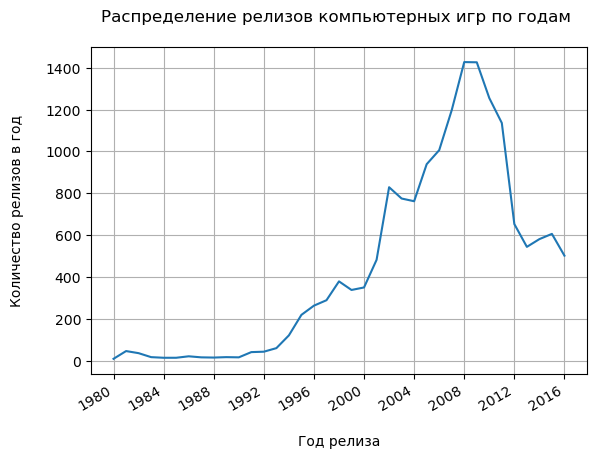

In [34]:
piv_year.plot(grid=True);
plt.title('Распределение релизов компьютерных игр по годам \n')
plt.ylabel('Количество релизов в год\n')
plt.xlabel('\nГод релиза')
plt.show();

### Вывод

* До 1993 года игр выпускалось мало (от 9 до 60 в год), после 1993 года наблюдается стабильный и значительный рост игровой индустрии с максимальным пиком в 2008-2009 годах (1427 игр в год). 
    
* С 1995 года количество выпускаемых копий достигает числа не меньше 200 млн копий в год.     

* Наибольший пик по количеству выпускаемых игр достигается в 2008-2009 годах и дальше количество игр, выпускаемых в год, начинает падать. 

* В 2016 году количество игр примерно достигает отметки 2013 года. 

Для анализа нам не нужны данные за весь временной промежуток, из линейного графика видно, что до 1995 года количество выпускаемых игр в год было не больше 200. 
    
Если мы планируем рекламную кампанию на 2017 год, то будем, видимо, учитывать продажи последних лет. Этот вопрос исследуем глубже и точнее дальше.

## Как менялись продажи по платформам 

Выберим платформы с наибольшими суммарными продажами и постройте распределение по годам.

Посмотрим на то, как у нас есть платформы

In [35]:
display(df['platform'].unique())

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Узнаем, сколько их всего в нашем датасете

In [36]:
print('Количество представленных в датасете платформ: ', len(df['platform'].unique()))

Количество представленных в датасете платформ:  31


Теперь выясним, какие платформы имеют самые большие суммарные продажи во всем мире. 

Мы возьмем данные позднее 1995 года (там число выпускаемых игр в год стабильно не ниже 200) и покажем топ 10 платформ по количеству продаваемых копий во всем мире.

In [37]:
platforms = df.query('year_of_release >= 1995').pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platforms.head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,721.55
PS4,314.14
GBA,312.88
PSP,289.53


Посмотрим, сколько данных мы отрезали, рассматривая только игры, выпущенные в 1995 и позже:

In [38]:
"Мы отрезали {:.1%} данных".format(1 - df.query('year_of_release >= 1995').shape[0] / df.shape[0])

'Мы отрезали 3.0% данных'

3% - это совсем мало и допустимо.

### Вывод

Лидером по суммарным продажам во всем мире является платформа PS2. С 1995 года по 2016 было продано свыше 1.2 млр. копий.

Дальше идет платформа X360 - продано почти миллиард копий во всем мире. 

На третьем место платформа PS3 - 931 млн копий. 

В конце списка топ10 платформа 3DS, продано 257 млн копий во всем мире. 

Посмотрим на список топ10 платформ с наибольшими суммарными продажами в мире - нам потом он понадобится для построения графика.

In [39]:
list(platforms.head(10).index)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

Теперь изучим, как менялись продажи платформ в каждом году позже 1995 года.

In [40]:
plat_years = df.query('year_of_release >= 1995').pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
plat_years.head()

platform,3DO,3DS,DC,DS,GB,GBA,GC,N64,NG,PC,...,PSV,SAT,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1995-01-01,0.08,NaN,NaN,NaN,3.60,NaN,NaN,NaN,0.33,4.22,...,NaN,11.57,32.20,0.16,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-01,NaN,NaN,NaN,NaN,36.03,NaN,NaN,34.10,0.10,10.58,...,NaN,7.69,15.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-01,NaN,NaN,NaN,NaN,6.37,NaN,NaN,39.50,NaN,11.27,...,NaN,6.77,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-01,NaN,NaN,3.38,NaN,26.90,NaN,NaN,49.24,NaN,3.26,...,NaN,3.82,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-01,NaN,NaN,5.16,NaN,38.00,NaN,NaN,57.87,NaN,4.74,...,NaN,0.09,0.26,NaN,0.46,NaN,NaN,NaN,NaN,NaN


Мы видим пустые ячейки. Они означают то, что в эти годы у этих платформ не было продаж. Заполним их нулями.

In [41]:
plat_years = plat_years.fillna(0)
plat_years.head()

platform,3DO,3DS,DC,DS,GB,GBA,GC,N64,NG,PC,...,PSV,SAT,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1995-01-01,0.08,0.0,0.00,0.0,3.60,0.0,0.0,0.00,0.33,4.22,...,0.0,11.57,32.20,0.16,0.00,0.0,0.0,0.0,0.0,0.0
1996-01-01,0.00,0.0,0.00,0.0,36.03,0.0,0.0,34.10,0.10,10.58,...,0.0,7.69,15.92,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1997-01-01,0.00,0.0,0.00,0.0,6.37,0.0,0.0,39.50,0.00,11.27,...,0.0,6.77,0.99,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1998-01-01,0.00,0.0,3.38,0.0,26.90,0.0,0.0,49.24,0.00,3.26,...,0.0,3.82,0.22,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1999-01-01,0.00,0.0,5.16,0.0,38.00,0.0,0.0,57.87,0.00,4.74,...,0.0,0.09,0.26,0.00,0.46,0.0,0.0,0.0,0.0,0.0


Строим график, показывающий, как распределяются продажи по годам для платформ с наибольшими суммарными продажами по всему миру. 

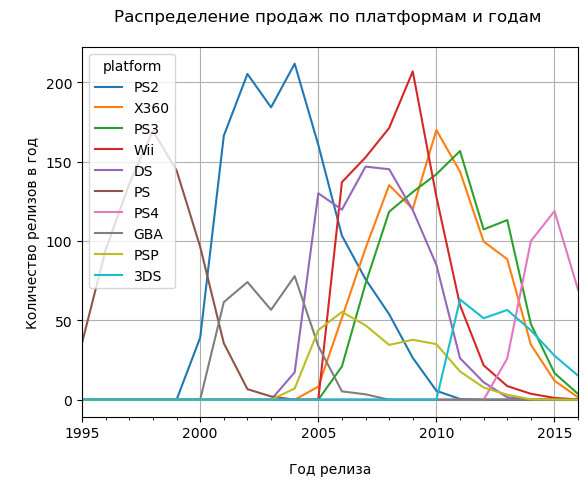

In [42]:
#выбираем топ10 платформ с наибольшими суммарными продажами
plat_years.loc[:, ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']].plot(grid=True); 
plt.title('Распределение продаж по платформам и годам \n')
plt.xlabel('\nГод релиза')
plt.ylabel('\nКоличество релизов в год')
plt.show();

Из графика хорошо видно, как одно поколение платформ сменяет другое: количество релизов для платформ старого поколения с появлением новой падает. 
Это легко увидеть на примере платформ: PS-PS2-PS3-PS4 и DS-3DS.

## Определение актуального для исследования периода

Для каждой платформы подсчитаем количество лет, в которые были продажи игр, и добавим информацию о дате последнего релиза (это можно вычислить с помощью функции max()).

In [43]:
for platform in plat_years.columns: 
    #для каждой платформы в таблице platforms вычисляем количество ячеек, в которых значение не равно 0, 
    #и записываем данные в новый столбец relevant (т.е. актуальный)
    platforms.loc[platforms.index == platform, 'relevant'] = plat_years.loc[plat_years.loc[:,platform] != 0].count()
    #добавляем информацию о последнем релизе c помощью функции max() в столбец last_release_date
    platforms.loc[platforms.index == platform, 'last_release_date'] = df.loc[
        df.loc[:,'platform']==platform, 'year_of_release'].max()

In [44]:
platforms

,total_sales,relevant,last_release_date
platform,,,
PS2,1233.56,12.0,2011-01-01
X360,961.24,12.0,2016-01-01
PS3,931.34,11.0,2016-01-01
Wii,891.18,11.0,2016-01-01
DS,802.76,10.0,2013-01-01
PS,721.55,9.0,2003-01-01
PS4,314.14,4.0,2016-01-01
GBA,312.88,8.0,2007-01-01
PSP,289.53,12.0,2015-01-01


Проверим на рандомном значении PS2, все ли верно у нас посчиталось.

In [45]:
plat_years[plat_years['PS2'] != 0].shape[0]

12

In [46]:
df.loc[df.loc[:,'platform']=='PS2', 'year_of_release'].max()

Timestamp('2011-01-01 00:00:00')

Все в порядке. Теперь узнаем, сколько в среднем платформа остается актуальной. Для этого посмотрим на медиану значений столбца relevant.

In [47]:
platforms['relevant'].describe()

count    26.000000
mean      7.192308
std       4.604513
min       1.000000
25%       4.250000
50%       7.000000
75%       9.750000
max      22.000000
Name: relevant, dtype: float64

In [48]:
print('Средняя продолжительность жизни платформы: ', platforms['relevant'].mean())

Средняя продолжительность жизни платформы:  7.1923076923076925


В среднем за 7 лет появляются новые и исчезают старые платформы. Но есть и платформа, которая продавалась весь период. Посмотрим ниже, что это за платформа.

In [49]:
platforms.sort_values(by='relevant', ascending=False).head()

,total_sales,relevant,last_release_date
platform,,,
PC,239.79,22.0,2016-01-01
PS2,1233.56,12.0,2011-01-01
X360,961.24,12.0,2016-01-01
PSP,289.53,12.0,2015-01-01
PS3,931.34,11.0,2016-01-01


Платформа PC продавалась все 22 года. То есть игры для персонального компьютера всегда были востребованы.

Посмотрим на платформы, которые выпускались в 2016 году (это последний год, данные за который у нас есть в нашем датафрейме).  

In [50]:
platforms = platforms.query('last_release_date == 2016').sort_values(by='total_sales', ascending=False)
platforms

,total_sales,relevant,last_release_date
platform,,,
X360,961.24,12.0,2016-01-01
PS3,931.34,11.0,2016-01-01
Wii,891.18,11.0,2016-01-01
PS4,314.14,4.0,2016-01-01
3DS,257.81,6.0,2016-01-01
PC,239.79,22.0,2016-01-01
XOne,159.32,4.0,2016-01-01
WiiU,82.19,5.0,2016-01-01
PSV,53.81,6.0,2016-01-01


Выведем список актуальных платформ.

In [51]:
print('Cписок актуальных платформ: ', list(platforms.index))

Cписок актуальных платформ:  ['X360', 'PS3', 'Wii', 'PS4', '3DS', 'PC', 'XOne', 'WiiU', 'PSV']


Отфильтруем нашу таблицу с распределением продаж по годам по актуальному периоду. 

Актуальный период рассчитаем так: из даты последнего года в нашем датафрейме (2016) отнимем половину средней жизни платформы.  
Почему мы берем половину средней жизни: так мы сможем выделить игры, которые находятся на пике или имеют растущие продажи, а так же игры, продажи которых, наоборот, уменьшаются.

In [52]:
#Рассчитываем акутальный период для нашего исследования и выводим на экран
print("Актуальный период исследования:", 2016 - ceil(platforms['relevant'].median()/ 2), '- 2016 гг.')

Актуальный период исследования: 2013 - 2016 гг.


### Вывод

* В среднем за 7 лет появляются новые и исчезают старые платформы.

* Для нашего исследования был определен актуальный временной промежуток: 2013 - 2016 гг. 

Он был рассчитан так: из даты последнего года в нашем датафрейме (2016) мы отняли половину средней жизни платформы. 

Это позволяет нам увидеть игры, которые находятся на пике или имеют растущие продажи, а так же игры, продажи которых, наоборот, уменьшаются. 

## Определение потенциально прибыльных платформ

Посмотрим на сводную таблицу по актуальному периоду: 2013- 2016 гг.

In [53]:
plat_years = plat_years[plat_years.index >= datetime.datetime.strptime(str(2013), '%Y')]
plat_years

platform,3DO,3DS,DC,DS,GB,GBA,GC,N64,NG,PC,...,PSV,SAT,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,56.57,0.0,1.54,0.0,0.0,0.0,0.0,0.0,12.38,...,10.59,0.0,0.0,0.0,0.0,8.59,21.65,88.58,0.0,18.96
2014-01-01,0.0,43.76,0.0,0.00,0.0,0.0,0.0,0.0,0.0,13.28,...,11.90,0.0,0.0,0.0,0.0,3.75,22.03,34.74,0.0,54.07
2015-01-01,0.0,27.78,0.0,0.00,0.0,0.0,0.0,0.0,0.0,8.52,...,6.25,0.0,0.0,0.0,0.0,1.14,16.35,11.96,0.0,60.14
2016-01-01,0.0,15.14,0.0,0.00,0.0,0.0,0.0,0.0,0.0,5.25,...,4.25,0.0,0.0,0.0,0.0,0.18,4.60,1.52,0.0,26.15


Возьмем актуальные платформы и построим распределение их продаж по всему миру в актуальный период 2013-2016 гг.

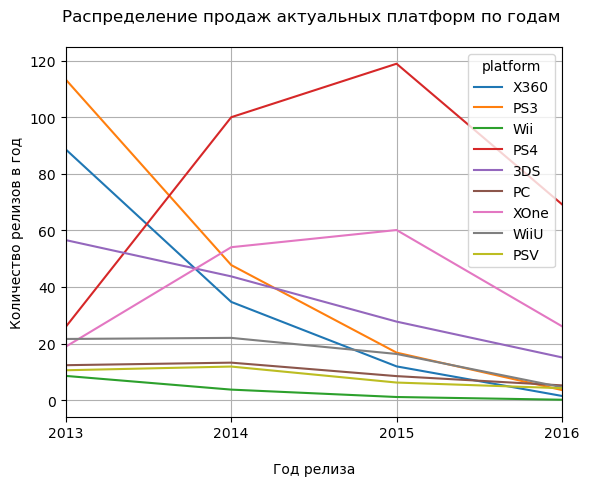

In [54]:
#выбираем актуальные платформы
plat_years.loc[:, ['X360', 'PS3', 'Wii', 'PS4', '3DS', 'PC', 'XOne', 'WiiU', 'PSV']].plot(grid=True); 
plt.title('Распределение продаж актуальных платформ по годам \n')
plt.ylabel('Количество релизов в год')
plt.xlabel('\nГод релиза')
plt.show();

На графике видно, что платформы PS4, XOne, 3DS, WiiU, PC еще в фазе активных продаж. Наиболее продаваемые - PS4 и XOne.

Продажи игр для платформ PS3, X360, Wii гораздо больше уменьшаются, поскольку на смену этим платформам пришли более новые PS4, WiiU, XOne.

Отфильтруем наш исходный датафрейм  - покажем только актуальный период и потенциально прибыльные платформы. Будем дальше проводить на нем исследования.

In [55]:
actual_df = df.query('year_of_release >= 2013 and platform in ("PS4", "XOne", "WiiU", "3DS", "PC")').reset_index(drop=True)
actual_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,missing,14.63
1,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,missing,14.60
2,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,missing,11.68
4,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [56]:
actual_df.describe()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1246.000000,1246.000000,1246.000000,1246.000000,711.000000,754.000000,1246.000000
mean,0.225024,0.215770,0.076236,0.061437,72.690577,6.647878,0.578467
std,0.530263,0.542095,0.303626,0.162041,12.536478,1.523835,1.282996
min,0.000000,0.000000,0.000000,0.000000,19.000000,1.400000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,66.000000,5.900000,0.040000
50%,0.040000,0.050000,0.000000,0.010000,75.000000,6.900000,0.140000
75%,0.190000,0.180000,0.050000,0.050000,81.000000,7.800000,0.490000
max,6.030000,6.310000,4.350000,2.380000,97.000000,9.300000,14.630000


Построим диаграммы размаха для потенциально прибыльных платформ, чтобы увидеть медиану и характерный разброс значений суммарных продаж за актуальный период 2012-2016 гг.

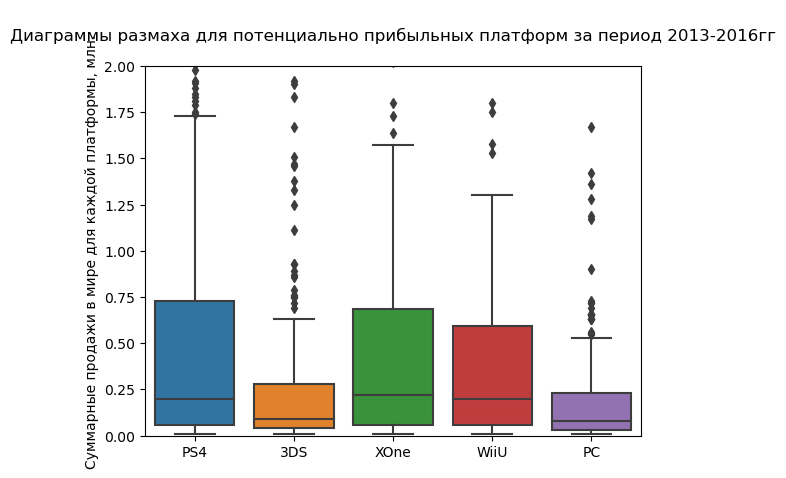

In [57]:
plt.figure()

ax = sns.boxplot(x='platform', y='total_sales', data=actual_df)
plt.title('\nДиаграммы размаха для потенциально прибыльных платформ за период 2013-2016гг\n')
plt.ylim(0,2)
plt.xlabel('') #чтобы убрать автоматические метки для осей
plt.ylabel('Суммарные продажи в мире для каждой платформы, млн.')
plt.show();

На ящике с усами хорошо видно, что самыми прибыльными являются игры для платформ PS4, XOne, WiiU, так как у этих платформ самое большое значение медианы. При этом стоит отметить и 3DS, поскольку у этой платформы довольно много выбросов: значит, есть прибыльные игры.

### Вывод

* Самыми прибыльным платформами за последние 3 года с 2013 - 2016 гг. являются: PS4, XOne, WiiU. 
    
* 3DS тоже заслуживает внимания, поскольку некоторые ее игры расходятся по всему миру тиражом в 15 млн копий. 

* Игры для платоформы PC (персонального компьютера) продавались все 22 года. То есть эта платформа востребована всегда.    

## Исследование влияния оценок пользователей и критиков на продажи

•	Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

•	Соотнесите выводы с продажами игр на других платформах.

In [58]:
actual_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,missing,14.63
1,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,missing,14.60
2,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,missing,11.68
4,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


Создадим функцию, которая будет вычислять коэффициент корреляции Пирсона для конкретной платформы между оценкой пользователя и критиков и суммарными продажами по всему миру. Также функция построит диаграмму рассеяния.
Мы не будем убирать выбросы, поскольку мы изучаем взаимосвязь только по ограниченному актуальному периоду.

In [59]:
"""
Функция берет на вход имя платформы (строку). 
Далее отфильтровывает данные по этой платформе и отбрасывает все пропущенные значения в столбцах critic_score и user_score.
После этого для каждого столбца 'user_score' и 'critic_score' в цикле вычисляется коэффициент корреляции Пирсона и выводится на экран,
а также строится диаграмма рассеяния для оценки и продаж в мире.

"""
def get_scores_corr(platform_corr):
    print('Платформа '+str(platform_corr)+':\n')
    #Отфильтруем NaN значения 
    without_nan = actual_df.query('platform == @platform_corr and critic_score == critic_score and user_score == user_score')
    for column in ['user_score', 'critic_score']:
        print('Коэффициент корреляции для столбца', column, '{:.2f}'.format(without_nan[column].corr(without_nan['total_sales'])))
        without_nan.plot(x=column,y='total_sales',kind='scatter');
        plt.ylabel('Суммарные продажи в мире для каждой игры')
        
        if column == 'user_score':
            plt.xlabel('Оценка пользователей')
            plt.title('\nЗависимость мировых продаж от оценок пользователей\n'+str(platform_corr))
        
        if column == 'critic_score':
            plt.xlabel('Оценка критиков')
            plt.title(('\nЗависимость мировых продаж от оценок критиков\n'+str(platform_corr)))

Проверим коэффициент корреляции Пирсона для платформы PS4, а также посторим диаграмму рассеяния. 

Платформа PS4:

Коэффициент корреляции для столбца user_score -0.03
Коэффициент корреляции для столбца critic_score 0.41


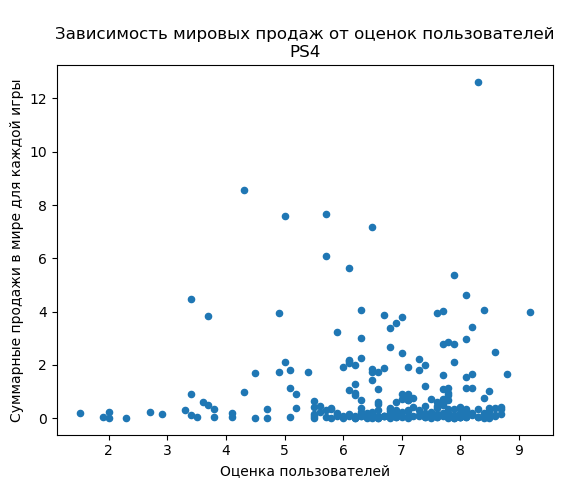

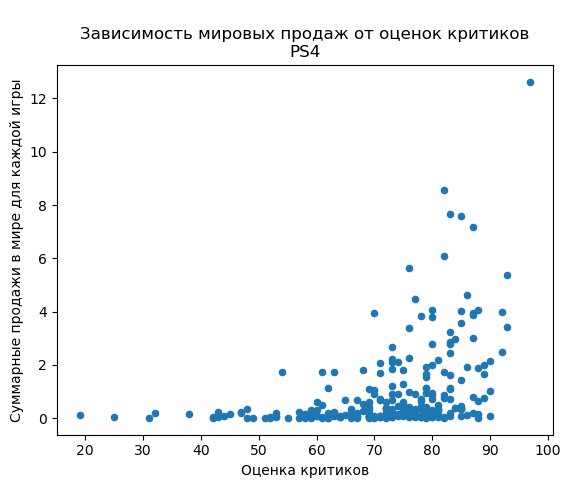

In [60]:
get_scores_corr('PS4')

Между оценками пользователей и продажами игр для платформы PS4 нет взаимосвязи. 

Между оценками критиков и продажами игр для платформы PS4 есть слабая положительная корреляция.

Проверим другие прибыльные платформы.

Платформа XOne:

Коэффициент корреляции для столбца user_score -0.09
Коэффициент корреляции для столбца critic_score 0.41

Платформа WiiU:

Коэффициент корреляции для столбца user_score 0.41
Коэффициент корреляции для столбца critic_score 0.38

Платформа 3DS:

Коэффициент корреляции для столбца user_score 0.27
Коэффициент корреляции для столбца critic_score 0.34

Платформа PC:

Коэффициент корреляции для столбца user_score -0.11
Коэффициент корреляции для столбца critic_score 0.19



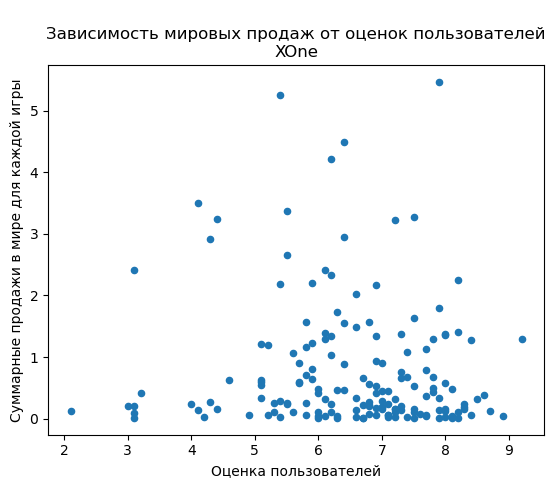

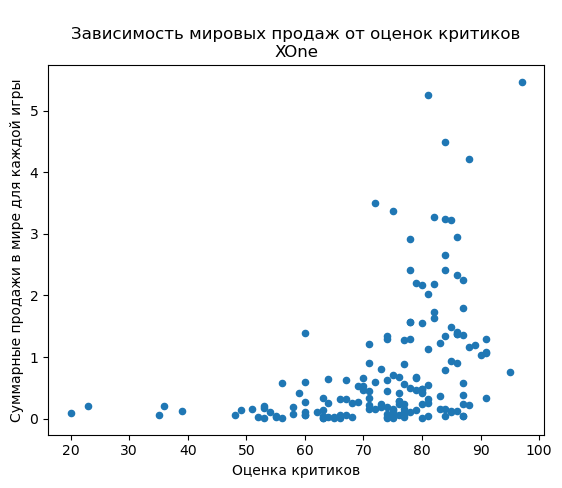

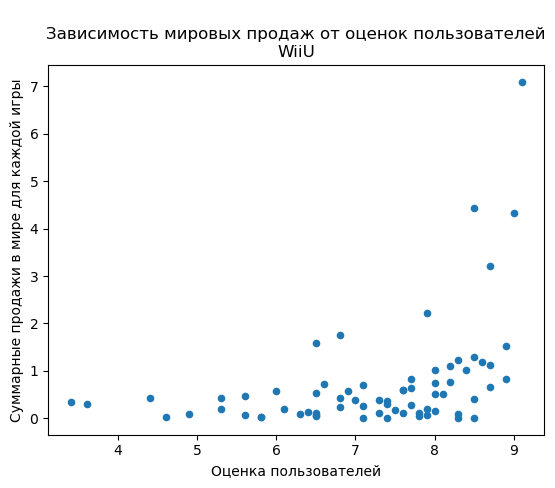

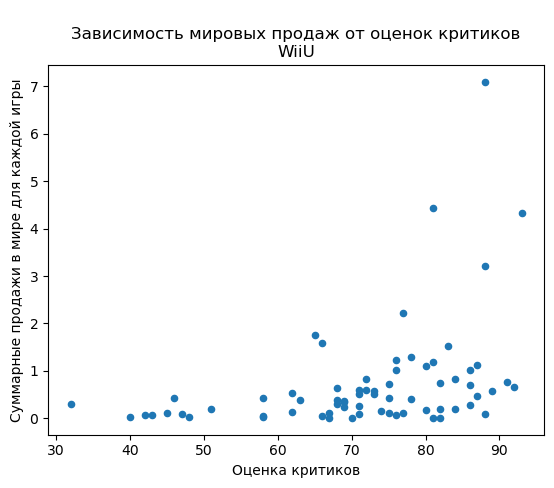

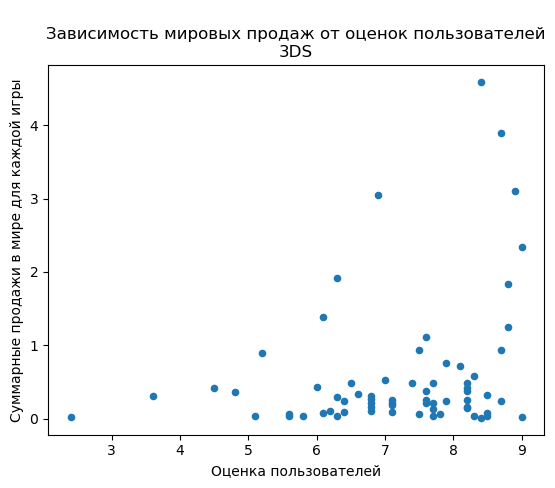

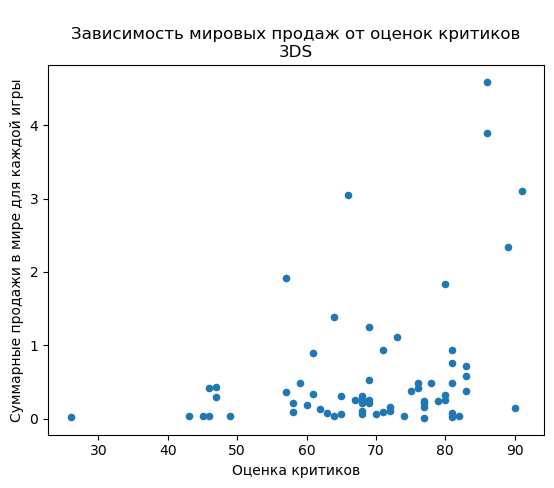

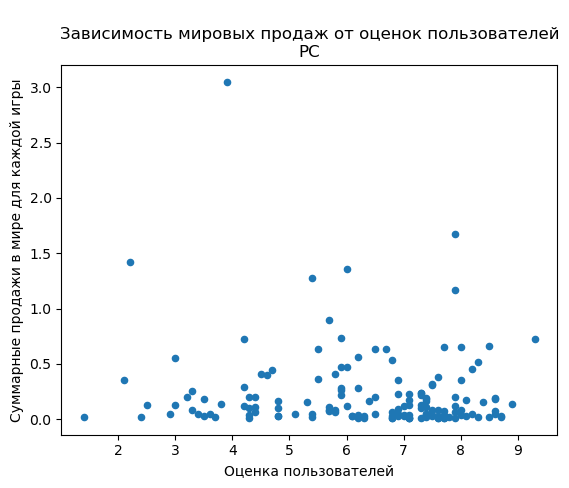

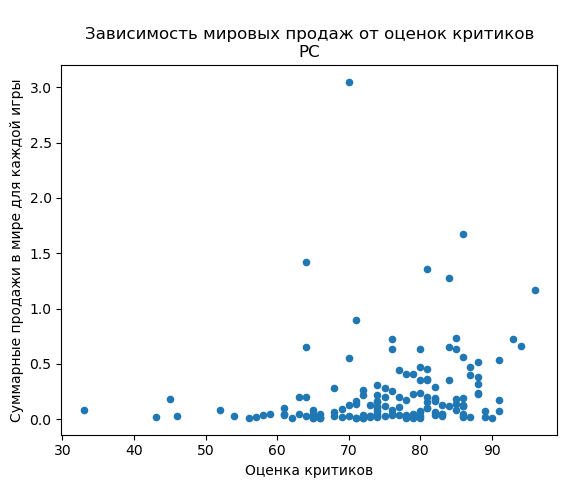

In [61]:
for platform in ["XOne", "WiiU", "3DS", "PC"]:
    get_scores_corr(platform)
    print('')

### Вывод

* Взаимосвязь между оценками критиков и продажами можно наблюдать для всех платформ. Для XOne и PS4 сильнее (коэффициент Пирсона равен 0.41), чем для остальных. 

* Оценка пользователей слабо влияет лишь для платформ WiiU и 3DS (0.39 и 0.20 соответственно).

* То есть в случае платформ XOne, PS4, PC нужно ориентироваться только на оценку критиков, а в случае WiiU и 3DS - на обе оценки (и пользователей, и критиков).

## Определение самых прибыльных жанров

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Сгруппируем данные по жанру, вычислим за  актуальный период значение медианы общей выручки по всем регионам для каждого жанра и количество игр каждого жанра  и отсортируем показ медианных продаж по убыванию.

In [62]:
genre_median = actual_df.groupby('genre')['total_sales'].agg('median').sort_values(ascending=False)
genre_median

genre
Shooter         0.495
Sports          0.275
Platform        0.260
Role-Playing    0.190
Fighting        0.155
Misc            0.120
Racing          0.120
Action          0.110
Simulation      0.100
Puzzle          0.085
Strategy        0.080
Adventure       0.060
Name: total_sales, dtype: float64

На первом месте жанр Shooter (в среднем продавалось не меньше 495 тыс копий), далее Sports (в среднем не меньше 275 тыс копий) и Platform (в среднем не меньше 260 тыс копий). 

Посмотрим и на общую выручку по всем регионам для каждого жанра и на количество игр для каждого жанра.

In [63]:
genre_sum = actual_df.groupby('genre')['total_sales'].agg(['sum', 'count']).sort_values(by='sum', ascending=False)
genre_sum

,sum,count
genre,,
Action,189.46,443
Shooter,164.27,120
Role-Playing,113.71,150
Sports,88.59,110
Platform,33.75,49
Misc,30.81,93
Racing,30.26,57
Fighting,25.50,38
Simulation,19.76,47


Данные отличаются. Только жанр Shooter показывает и по средним продажам, и по суммарным хороший показатель. При этом мы видим большое количество игр у топовых жанров по общим продажам. То есть за общими продажами могут скрываться множество мелких игр с низкими продажами. Поэтому суммарные продажи - не надежная метрика для определения прибыльного жанра. 

Построим круговую диаграмму, показывающую распределение медианных продаж по жанрам.

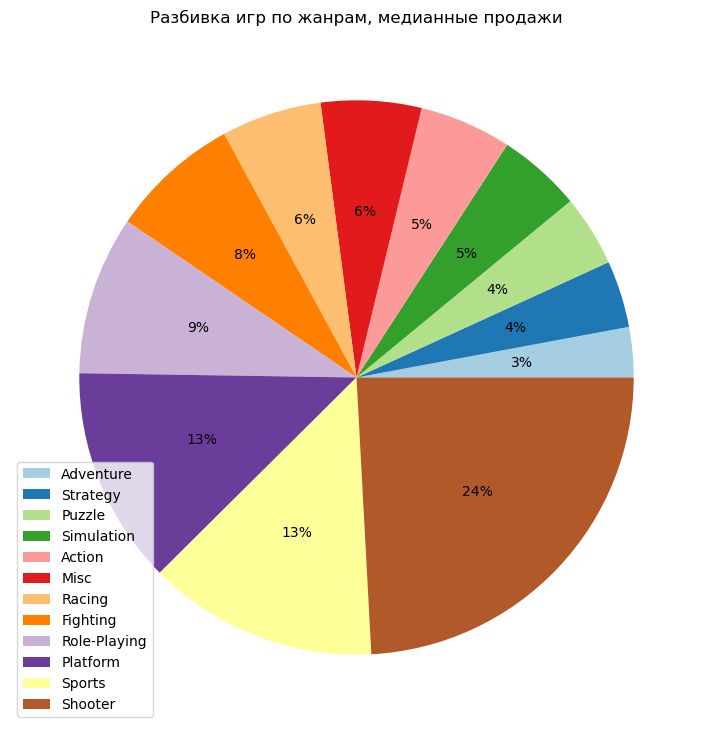

In [64]:
(genre_median.sort_values(ascending=True)
 .plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(9,9), title='Разбивка игр по жанрам, медианные продажи', cmap='Paired')) 
# cmap='Paired' - чтобы цвета были хорошо различимы
plt.show()

Построим простенький ящик с усами для суммарных продаж

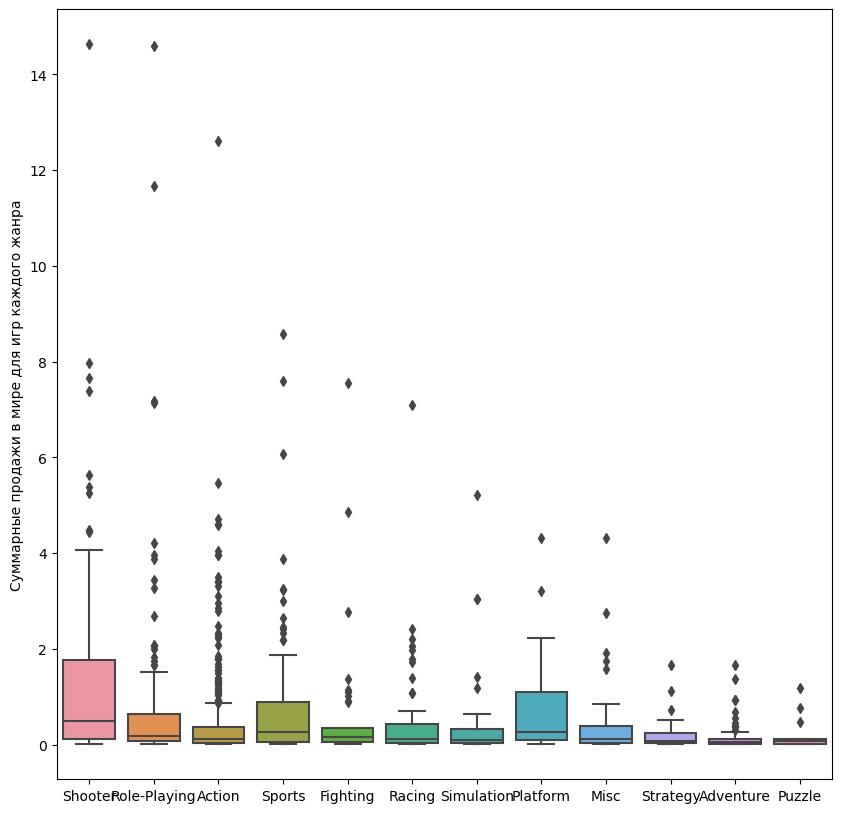

In [65]:
plt.figure(figsize=(10,10))
sns.boxplot(x='genre', y='total_sales', data=actual_df);
plt.xlabel('') #чтобы убрать автоматические метки для осей
plt.ylabel('Суммарные продажи в мире для игр каждого жанра')
plt.show()

### Вывод

* Всего в нашем датасете представлено 12 жанров.     

* Самыми стабильно прибыльными жанрами во всем мире являются Shooter (в среднем продавалось не меньше 495 тыс копий, 24 % от всей выборки), Sports (в среднем не меньше 275 тыс копий - 13 % от всей выборки) и Platform (в среднем не меньше 260 тыс копий - 13 % от всей выборки).

* Самый большой размах значений у платформы Shooter. У Shooter, Role_Playing есть игры-бестселлеры с числом продаваемых копий 15 млн.

* Самые низкие прибыли приносят игры жанров Puzzle, Adventure, Strategy (об этом говорят и суммарные продажи, и медианные). И бестселлеров у этих жанров нет.

## Общий вывод

В результате исследовательского анализа мы выяснили:

* В исходном датасете содержатся игры за довольно большой временной промежуток - с 1980 года по 2016 год. 

* Для составления прогноза на 2017 год важны не все данные. 

* Топ 10 самых прибыльных платформ с 1995 года:
PS2 - продано свыше 1.2 млр. копий. Дальше идет платформа X360 - продано почти миллиард копий во всем мире. На третьем место платформа PS3 - 931 млн копий. В конце списка топ10 платформа 3DS, продано 257 млн копий во всем мире. Однако из всех этих платформ только 3DS осталась потенциально прибыльной за последние годы.

* Характерный срок, за который появляются новые платформы и исчезают старые -  7 лет.

* Актуальный для исследования и прогнозирования период: c 2013 года по 2016 год. Для его вычисления мы использовали характерный срок актуальности платформы и дату последнего релиза в датасете (2016 год). От последней даты отнимали половину характерного срока актуальности платформы.
    
* Наиболее прибыльными платформами в период  c 2013 года по 2016 год являются: PS4, XOne, WiiU, 3DS. В список актуальных платформ мы добавили и платформу PC, поскольку она продается на протяжении 22 лет.

* В случае с платформами PC, PS4, XOne правильнее всего ориентироваться на отзывы критиков, а в случае с 3DS и WiiU - и критиков, и пользователей.

* Самые прибыльные жанры игр во всем мире по медианным продажам: Shooter (в среднем продавалось не меньше 495 тыс копий, 24 % от всей выборки), Sports (в среднем не меньше 275 тыс копий - 13 % от всей выборки) и Platform (в среднем не меньше 260 тыс копий - 13 % от всей выборки).

<a name="stage_4"></a>
# Этап 4. Составьте портрет пользователя каждого региона

[Наверх к оглавлению](#contents)

Определите для пользователя каждого региона (NA, EU, JP):

•	Самые популярные платформы (топ-5). Опишите различия в долях продаж.

•	Самые популярные жанры (топ-5). Поясните разницу.

•	Влияет ли рейтинг ESRB на продажи в отдельном регионе?

## Самые популярные платформы (топ-5) каждого региона

In [66]:
actual_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,missing,14.63
1,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,missing,14.60
2,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,missing,11.68
4,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


Создадим общую функцию, которая будет группировать данные по нужному нам столбцу, вычислять суммарные продажи для конкретного региона и создавать круговую диаграмму, показывающую процент суммарных продаж для каждого параметра. 

In [67]:
"""
Функция на вход берет строковые значения:

index - название столбца, по которому группируем данные; 
value - название столбца (в нашем случае это будут всегда продажы по конкретному региону), к данным которых будем применять агрегирующую функцию
region - название региона, для которого мы создаем портрет (должно коррелировать с префиксом в value).

Возвращает piv_tbl - сводную таблицу (датафрейм) и выводит круговую диаграмму. 
"""
def get_pivot_table_and_pie(index, value, region):
    print('\nПортрет для региона '+ str(region)+':\n')
    piv_tbl = actual_df.pivot_table(index= index, values=value, aggfunc='sum') 
    piv_tbl = piv_tbl.sort_values(by=value, ascending=False)
    piv_tbl[value].plot(kind='pie', label='', autopct='%1.0f%%', #позволяет нам увидеть процент от общей выборки
       legend=True, figsize=(10, 10), title='Распределение продаж в % для региона '+ str(region), cmap='Paired') 
    # cmap='Paired' - чтобы цвета были хорошо различимы      
    
    return piv_tbl
          

Применяем нашу функцию к данным по Северной Америки


Портрет для региона Северная Америка:



,na_sales
platform,
PS4,108.74
XOne,93.12
3DS,38.20
WiiU,29.21
PC,11.11


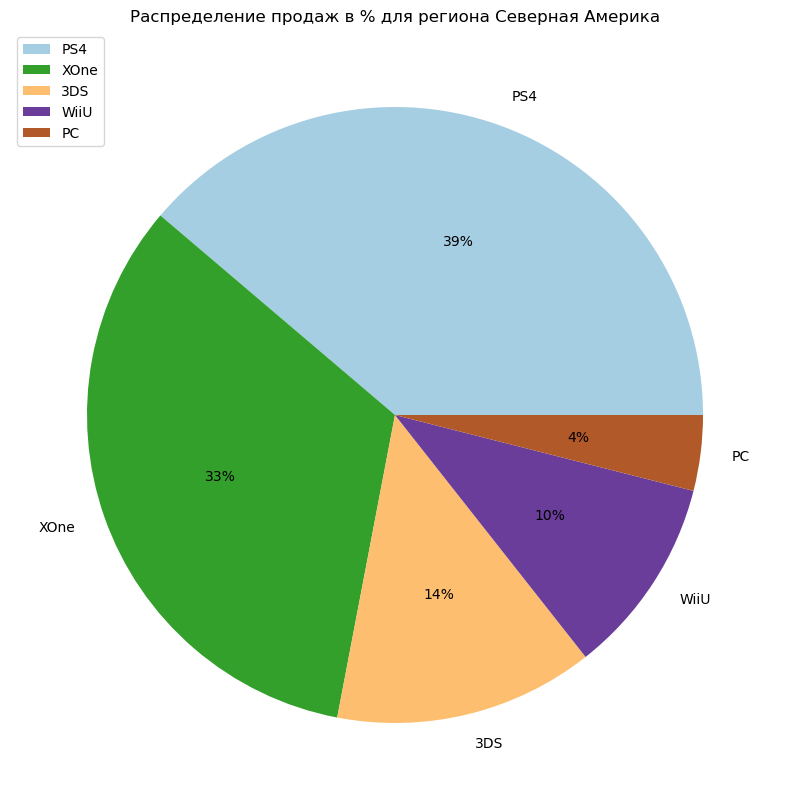

In [68]:
get_pivot_table_and_pie('platform', 'na_sales', 'Северная Америка')

Применяем нашу функцию к данным по Европе


Портрет для региона Европа:



,eu_sales
platform,
PS4,141.09
XOne,51.59
3DS,30.96
PC,25.36
WiiU,19.85


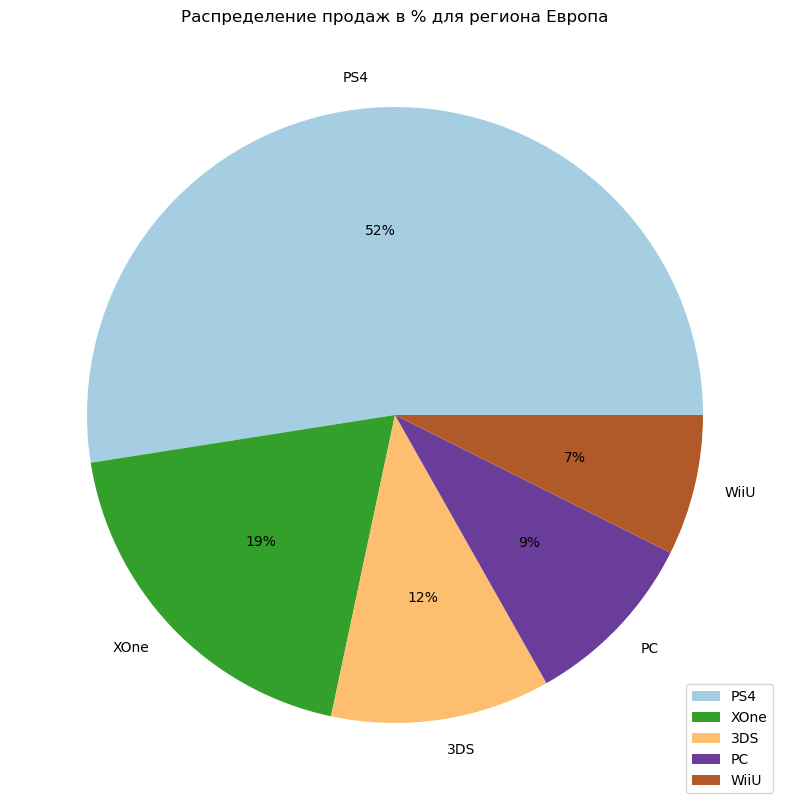

In [69]:
get_pivot_table_and_pie('platform', 'eu_sales', 'Европа')

Применяем нашу функцию к данным по Японии


Портрет для региона Япония:



,jp_sales
platform,
3DS,67.81
PS4,15.96
WiiU,10.88
XOne,0.34
PC,0.00


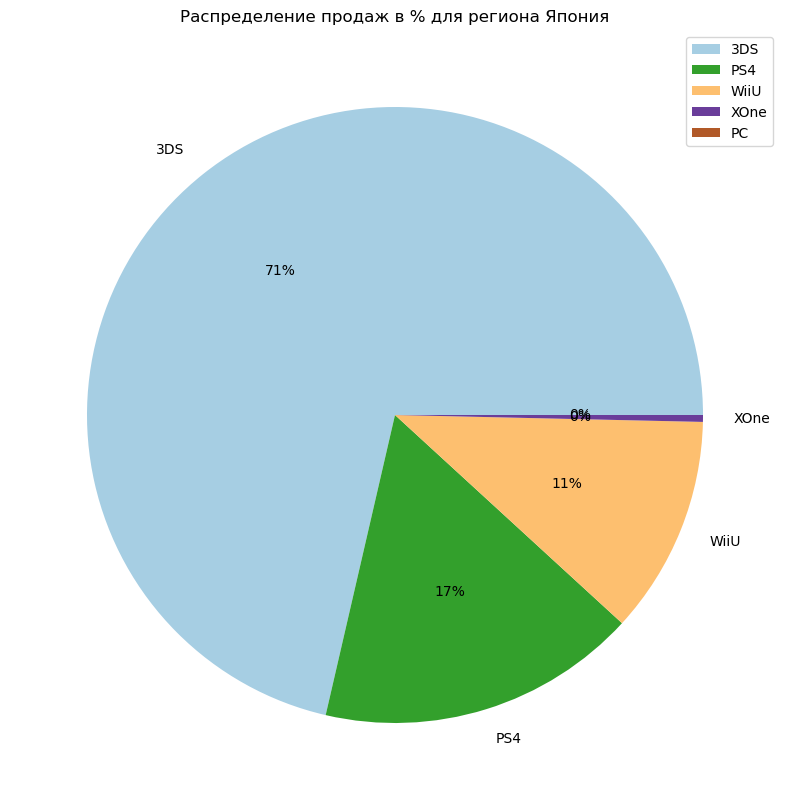

In [70]:
get_pivot_table_and_pie('platform', 'jp_sales', 'Япония')

### Вывод

* В Северной Америке самые успешные платформы PS4 и XOne, которые занимают 39% и 33%, то есть  2/3 рынка. 

* В Европе самая успешная платформа PS4, продажи игр которой составляют 52% всего рынка, продажи игр для остальных платформы (XOne, 3DS, PC, WiiU) - 19%, 12%, 9%, 7%.

* В В Японии самая успешная платформа - 3DS, она имеет 71% от всех продаж в регионе. Игры для платформы PC в Японии вообще не продаются. Продажи для XOne составляют менее 1%.

* Наименее перспективной платформой во всем мире можно назвать платформу PC. 

## Самые популярные жанры (топ-5) каждого региона

Ранее мы вычислили, что всего в нашем датасете 12 жанров и самыми прибыльными жанрами во всем мире являются Action , Shooter , Role_Playing (135 млн копий, или 17% от всей выборки). 
Теперь посмотрим, какие жанры наиболее популярны в каждом регионе.

Используем нашу функцию для группировки данных по жанрам и построения круговой диаграммы, показывающей нам распределение жанров по каждому региону.

Применяем нашу функцию к данным по Северной Америки


Портрет для региона Северная Америка:



,na_sales
genre,
Shooter,74.85
Action,72.43
Sports,36.74
Role-Playing,36.35
Platform,14.02
Misc,12.14
Fighting,11.84
Racing,10.29
Simulation,4.07


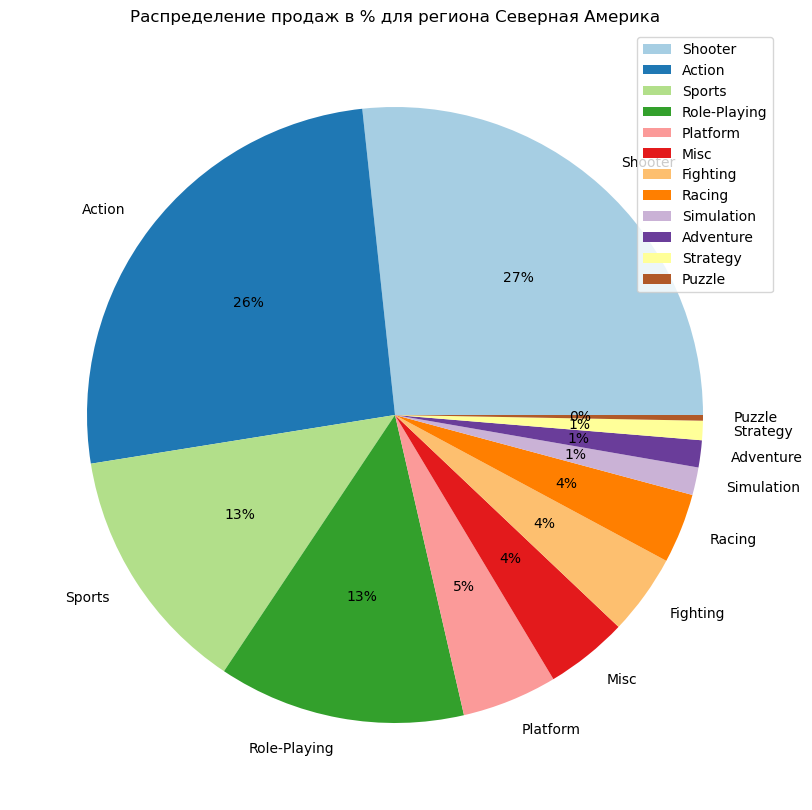

In [71]:
get_pivot_table_and_pie('genre', 'na_sales', 'Северная Америка')


Портрет для региона Европа:



,eu_sales
genre,
Action,71.98
Shooter,64.34
Sports,37.91
Role-Playing,30.96
Racing,15.17
Platform,11.99
Simulation,10.17
Misc,9.76
Fighting,6.42


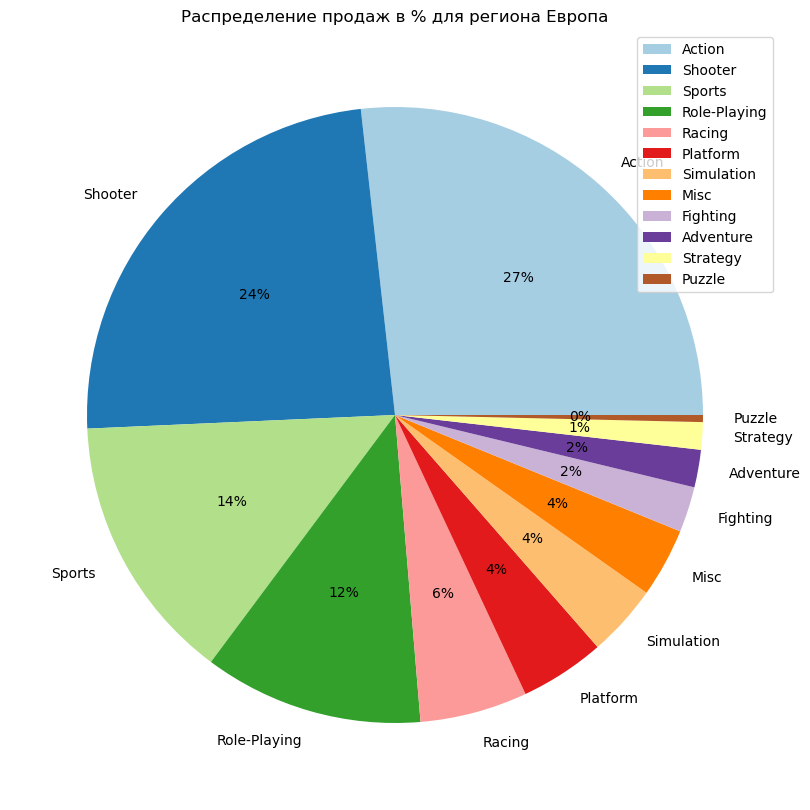

In [72]:
#Применяем нашу функцию к данным по Европе
get_pivot_table_and_pie('genre', 'eu_sales', 'Европа')


Портрет для региона Япония:



,jp_sales
genre,
Role-Playing,38.00
Action,24.00
Misc,6.23
Platform,4.71
Fighting,4.68
Shooter,4.51
Simulation,4.25
Adventure,2.43
Sports,2.34


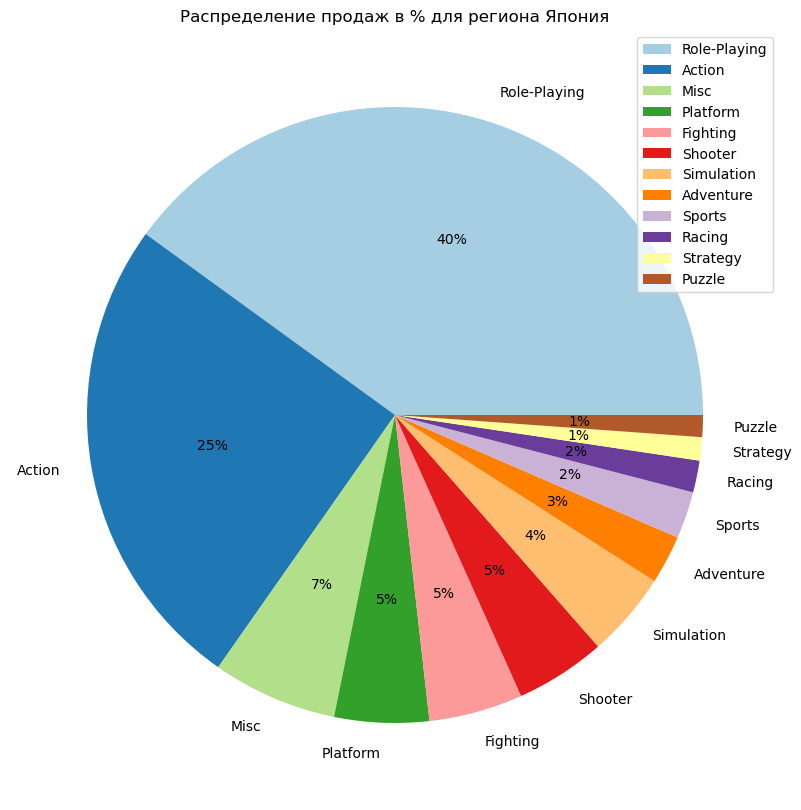

In [73]:
#Применяем нашу функцию к данным по Японии
get_pivot_table_and_pie('genre', 'jp_sales', 'Япония')

### Вывод


Северная Америка и Европа очень похожи по популярности жанров.

| Жанр                     | Северная Америка | Европа | Япония |
|--------------------------|-----------------|--------------------|-------------|
| Action               | 26%          | 27%               | 25%         |
| Shooter                  | 27%           | 24%               | 5%        |
| Role-Playing                 | 13%           | 12%                  | 40%          |
| Sports                | 13%           | 14%               | 2%        |
| Platform              | 5%           | 4%                | 5%        |


Япония выделяется: там самый популярный жанр - Role-Playing (40%), дальше Action (25%), Misc (7 % ) и Platform(5%).

## Влияет ли рейтинг ESRB на продажи в отдельном регионе

Посмотрим на самые продаваемые игры с точки зрения рейтинга ESRB.

Выведем список рейтингов в нашем датафрейме

In [74]:
df['rating'].unique()

array(['E', 'missing', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Напомним, что значение missing мы проставили на место пропущенных данных. 

Для того чтобы выяснить, что означают остальные аббревиатуры, можно почитать [статью](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board#%D0%9E%D0%BF%D0%B8%D1%81%D0%B0%D0%BD%D0%B8%D0%B5) в Википедии.

Снова применим нашу чудесную функцию, чтобы составить представление о распределении игр в зависимости от рейтинга ESRB в каждом регионе.

Применяем нашу функцию к данным по Северной Америки


Портрет для региона Северная Америка:



,na_sales
rating,
M,95.62
missing,67.40
E,51.84
T,33.67
E10+,31.85


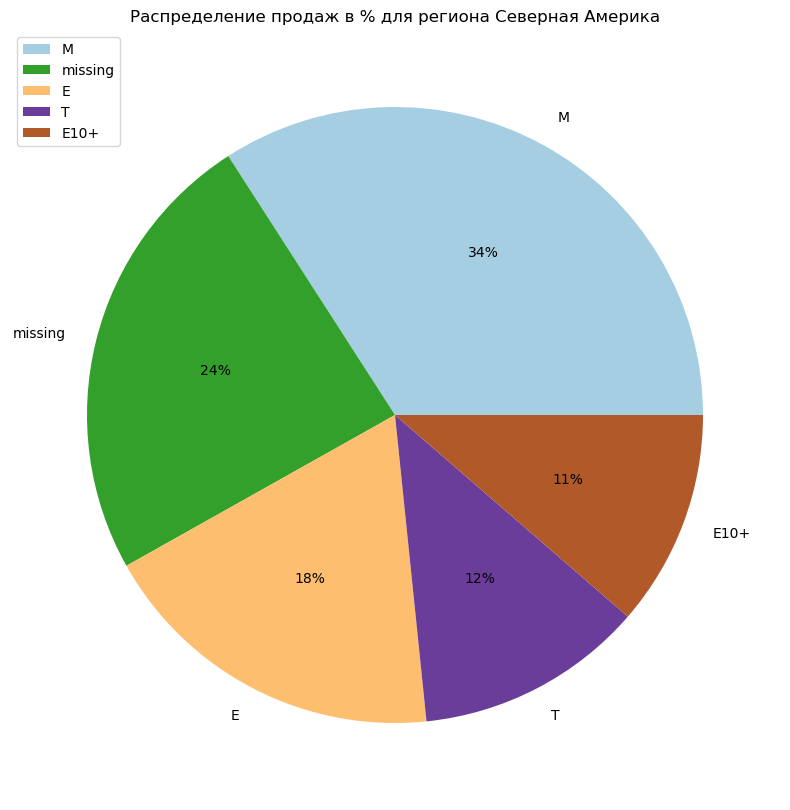

In [75]:
get_pivot_table_and_pie('rating', 'na_sales', 'Северная Америка')


Портрет для региона Европа:



,eu_sales
rating,
M,93.37
missing,62.05
E,57.00
T,31.38
E10+,25.05


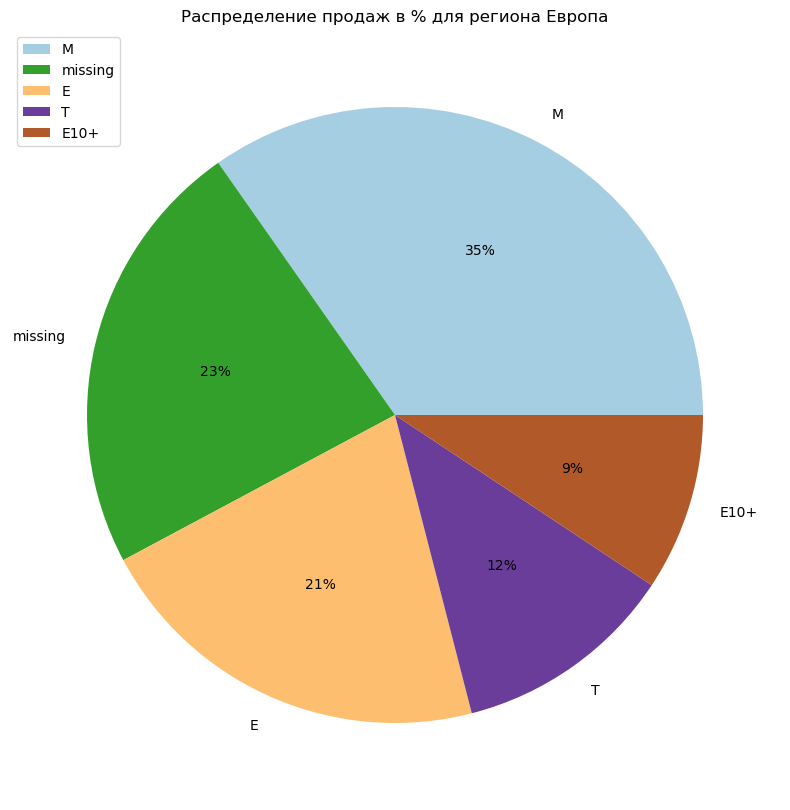

In [76]:
#Применяем нашу функцию к данным по Европе
get_pivot_table_and_pie('rating', 'eu_sales', 'Европа')


Портрет для региона Япония:



,jp_sales
rating,
missing,61.22
E,13.20
T,8.44
M,6.75
E10+,5.38


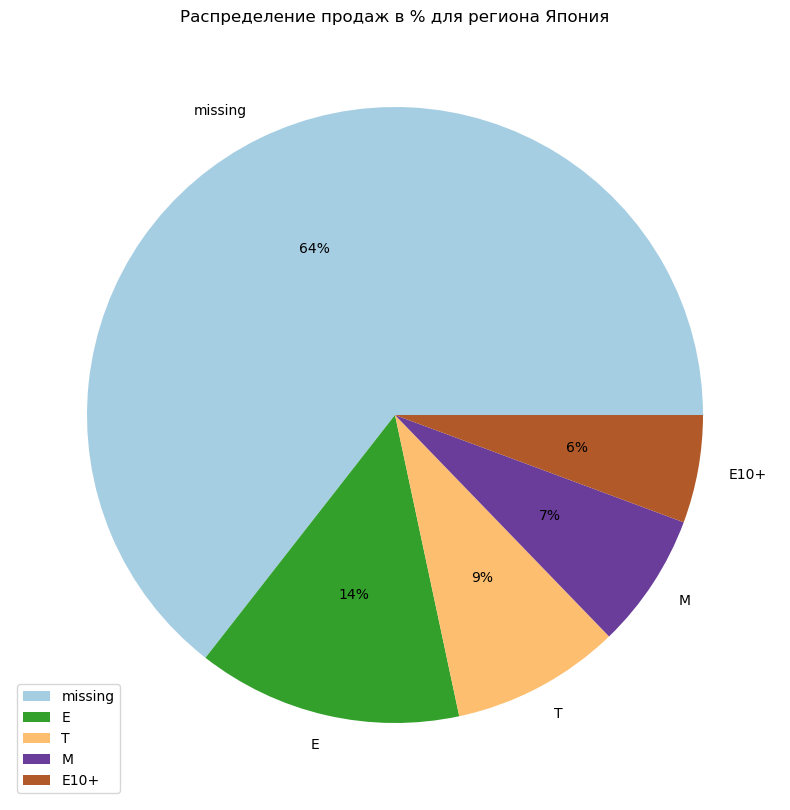

In [77]:
#Применяем нашу функцию к данным по Японии
get_pivot_table_and_pie('rating', 'jp_sales', 'Япония')

### Вывод

И снова японский рынок заметно отличается от северо-американского и европейского, в то время как два последних рынка похожи. 



| Рейтинг ESRB                     | Северная Америка | Европа | Япония |
|--------------------------|-----------------|--------------------|-------------|
| M               | 34%          | 35%               | 7%         |
| missing                  | 24%           | 23%               | 64%        |
| E                 | 18%           | 21%                  | 14%          |
| E10                | 11%           | 9%               | 6%        |
| T              | 12%           | 12%                | 9%        |


В Северной Америке и в Европе игры для взрослых (M) продаются лучше всего(34%-35%) , далее прибыльны игры с неизвестным рейтингом (24%-23%), после игры для всех (E) продажи которых составляют (18-21%) и игры для детей старше 10 лет (E10) - 11-9% от всего рынка. Хуже всего продажи у игр  для подростком (T) - 12%.
    
В Японии же самыми прибыльными являются игры с неизвестным нам рейтингом (64%), далее хорошо продаются игры для всех (14%),  игры с рейтингом 'подросткам' составляют 9% от всех продаж и игры для взрослых и от 10 лет и старше продаются хуже всего и одинаково (7%- 6%).  

<a name="stage_5"></a>
# Этап 5. Проверка гипотез
[Наверх к оглавлению](#contents)



Задайте самостоятельно пороговое значение alpha.

Поясните:

•	Как вы сформулировали нулевую и альтернативную гипотезы;

•	Какой критерий применили для проверки гипотез и почему.

## Проверка гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую гипотезу:

𝐻0  - Средние пользовательские рейтинги платформ Xbox One и PC равны.

Сформулируем альтерантивную гипотезу:

𝐻1  - Средние пользовательские рейтинги платформ Xbox One и PC отличаются.


Возьмем уровень значимости 𝛼=5% 

In [78]:
alpha=.05

Создадим две выборки: средние пользовательские рейтинги для платформы Xbox One (у нас она называется Xone) и PC

Делаем срез нужных данных: только не пропущенные значения в user_score и только для платформы Xone

In [79]:
xone_scores = actual_df.query('platform == "XOne" and user_score == user_score' ) ['user_score']
xone_scores.head()

15    7.9
17    5.4
23    6.4
28    6.2
41    4.1
Name: user_score, dtype: float64

То же самое - срезаем только не пропущенные значения в user_score и только  для платформы PC

In [80]:
pc_scores = actual_df.query('platform == "PC" and user_score == user_score')['user_score']
pc_scores.head()

55     3.9
114    7.9
132    2.2
140    6.0
149    5.4
Name: user_score, dtype: float64

Смотрим на размеры наших выборок

In [81]:
print("Размер выброки xone_scores:", len(xone_scores))
print("Размер выброки pc_scores:", len(pc_scores))

Размер выброки xone_scores: 182
Размер выброки pc_scores: 155


Выборки достаточно большие и примерно одинаковые по размеру.

Посмотрим на дисперсии выборок. Поскольку мы имеем дело не с генеральной совокупностью, а с выборками установим параметр ddof=1

In [82]:
print('Дисперсия выборки пользовательских оценок для платформы Xone:', xone_scores.var(ddof=1))
print('Дисперсия выборки пользовательских оценок для платформы PC:', pc_scores.var(ddof=1))

Дисперсия выборки пользовательских оценок для платформы Xone: 1.9069968429360702
Дисперсия выборки пользовательских оценок для платформы PC: 3.035892752408884


У нас достаточно большие выборки, чтобы не проверять нормальность распределения. К тому же, средние выборок не зависят друг от друга. Поэтому проверим гипотезу, используя встроенную в библиотеку scipy функцию ttest_ind, которая вычисляет уровень значимости критерия Стьюдента для двух независимых выборок.

Поскольку выборки у нас разного размера и есть сомнения, что дисперсии у совокупностей одинаковые, укажим параметр equal_var как False, и тест посчитает дисперсии выборок по отдельности.

Создадим функцию для проведения t-теста Стьюдента. Нам она понадобится для поверки двух гипотез в этом шаге исследования.

In [83]:
"""
Функция берет на вход:

sample1, sample2 - две выборки (объекты  series), 
alpha - число (уровень статистической значимости)
equal_var - булево значение False или True 

С помощью функции ttest_ind вычисляет уровень значимости критерия Стьюдента и сравнивает его с уровнем статистической значимости.
На этом основании выводится сообщение либо о том, что нулевая гипотеза отвергается, либо не отвергается.

"""
def ttest(sample1, sample2, alpha, equal_var=False):
    alpha = alpha
    results = st.ttest_ind(sample1, sample2, equal_var=False) 
    print('p-значение:', results.pvalue)

    if (results.pvalue < alpha): #если p-value окажется меньше критического уровня значимости - отвегнем нулевую гипотезу 
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

Запускаем функцию для проверки нашей гипотезы о равенстве пользовательских оценок для двух платформ. 

In [84]:
ttest(xone_scores, pc_scores, .05, equal_var=False)

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Результат теста говорит нам о том, что нельзя отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Вычислим так же средние оценки и проверим значения.

In [85]:
actual_df.query('(platform == "XOne" or platform == "PC") and user_score == user_score') .pivot_table(
                                    index='platform', values='user_score')

,user_score
platform,
PC,6.269677
XOne,6.521429


Да, пользовательские оценки для платформ XOne и PC очень близки по среднему значению.

## Проверка гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую гипотезу:

𝐻0  - Средние пользовательские рейтинги жанров Action и Sports равны.

Сформулируем альтерантивную гипотезу:

𝐻1  - Средние пользовательские рейтинги жанров Action и Sports отличаются.

Возьмем уровень значимости 𝛼=5%

Создаем две выборки: пользовательские оценки для игр жанра Action и для игр жанра Sports. Пропущенные значения в срез не включаем.

In [86]:
action = actual_df.query('genre == "Action" and user_score == user_score')['user_score']
action.head()

2     8.3
15    7.9
21    8.1
22    8.4
30    6.3
Name: user_score, dtype: float64

In [87]:
sports = actual_df.query('genre == "Sports" and user_score == user_score')['user_score']
sports.head()

4     4.3
7     5.0
13    5.7
36    6.7
49    4.4
Name: user_score, dtype: float64

Смотрим на размеры наших выборок

In [88]:
print("Размер выброки xone_scores:", len(action))
print("Размер выброки pc_scores:", len(sports))

Размер выброки xone_scores: 254
Размер выброки pc_scores: 96


Выборки достаточно большие, но очень разные по размеру.

Проверим их дисперсии.

In [89]:
print('Дисперсия выборки пользовательских оценок для игр жанра Action:', action.var(ddof=1))
print('Дисперсия выборки пользовательских оценок для игр жанра Sports:', sports.var(ddof=1))

Дисперсия выборки пользовательских оценок для игр жанра Action: 1.7493934206840736
Дисперсия выборки пользовательских оценок для игр жанра Sports: 2.4282883771929815


Есть сомнения, что дисперсии у совокупностей одинаковые, поэтому укажим параметр equal_var как False при проведении t-теста.

In [90]:
ttest(action, sports, .05, equal_var=False)

p-значение: 6.954390687344237e-11
Отвергаем нулевую гипотезу


У нас получилось отвергнуть нулевую гипотезу, то есть мы можем утверждать, что средние пользовательские рейтинги жанров Action и Sports разные, отличаются. Проверим это, вычислив эти средние значения в наших выборках.

In [91]:
actual_df.query('(genre == "Action" or genre == "Sports") and user_score == user_score') .pivot_table(
                                    index='genre', values='user_score')

,user_score
genre,
Action,6.822047
Sports,5.561458


Да, действительно отличаются.

### Вывод

В ходе статистического анализа мы проверили две гипотезы с уровнем значимости  𝛼=5% :

Первая нулевая гипотеза гласила о том, что средние пользовательские оценки платформ XOne и PC равны.
    
Вторая нулевая гипотеза гласила о том, что средние оценки от пользователей для жанров Action и Sports равны.

В качестве альтернативных гипотез для обоих случаев мы выбрали утверждение о том, что средние рейтинги отличаются. 

Для проверки гипотез мы использовали уровень значимости критерия Стьюдента для независимых выборок. В данном случае мы используем именно его, т.к. средние рейтинги выборок не зависят друг от друга.

В случае с платформами нам не удалось отвергнуть нулевую гипотезу, поэтому мы можем утверждать, что при сравнении средних оценок платформ мы бы получали схожие значения с вероятностью в 55%

В случае с жанрами мы отвергли нулевую гипотезу о том, что средние пользовательские оценки жарнов Action и Sports равны. 

<a name='stage_6'></a>
# Этап 6. Общий вывод
[Наверх к оглавлению](#contents)

Чтобы выявить закономерности успешной компьютерной игры, мы проанализировали датасет, данные в котором собраны из открытых источников.
Мы прочитали и сохранили cvs файл с данными в переменную df и выяснили, что в полученной таблице 16715 строк (наблюдений) и 11 столбцов (параметров, описывающих каждое наблюдение). Дубликатов нет. 
В датафрейме содержатся данные двух типов: строка (object) и числа с плавающей точкой (float64). 

Таблица дает нам следующую информацию об играх: 

* всего записано 16715 игр (по количеству строк); 

* на 31 платформе;

* самый ранний релиз датирован 1980 годом;

* самый поздний релиз приходится на 2016 год, по дате выгрузки таблицы; 

* для каждой игры записана информация о продажах на трех основных рынках мира - Северной Америки, Европы и Японии - и отдельно продажи в остальных регионах; 

* для каждой игры указаны отметки о возрастном рейтинге игры (рейтинг ESRB), оценки пользователей и критиков;

В ходе анализа представленной в датафрейме информации мы обнаружили следующие проблемы, которые обработали по следующим принципам:

* Заглавные буквы в названии столбцов заменили на строчные для удобства работы с данными.

* Значительное количество пропусков в столбцах с оценками пользователей (40% от всей выборки), критиков (51% от всей выборки) 
мы никак не обрабатывали, поскольку нет возможности более и менее корректно заполнить такие пропуски, не искажая данные. При анализе данных мы просто отфильтровывали такие пропущенные значения. Более того, обнаруженное строковое значение tbd (значение не определено) в оценках пользователей мы вынуждены были заменить на пропущенное значение (NaN).
В столбце с возрастным рейтингом (40% от всей выборки) мы заменили пропущенные значения значением "missing" (т.е. данные отсутствуют) и таким образом пропуски в данных в этом столбце составили 54% от всей выборки.

* Мы удалили строчки с пропущенными значениями в названии, жанре и годе релиза. Так как данных было мало (0.012 % и 1.6% от всей выборки), а дальнейший анализ строится на информации о выпуске игр, отсечении игр из неактуального периода, то эти данные нам важно оставить с правильными значениями.
Пропуски могли появиться при парсинге сайтов (если данные были собраны путем парсинга), из-за отстутвия данных на страницах с играми или иными ошибками, связанными с логикой выполнения парсинга, выгрузке данных.


* Были изменены типы данных в столбце года выпуска игры со строчного на тип данных datetime (записан в отдельный столбец), а для столбца user_score - на числа с плавающей точкой.

Для дальнейшего анализа был добавлен новый столбец total_sales - с суммарными продажами игр в мире, как сумма продаж в Северо-Американском, Европейском, Японском и других регионах.



В результате исследовательского анализа удалось выяснить следующее:

* В датасете содержатся игры за большой временной промежуток - с 1980 года по 2016 год. Но не все эти данные полезны для составления прогноза на 2017 год. 

(Мы построили распределения продаж игр по платформам и выделили топ 10 самых успешных платформ в период с 1995 года.)

* Лидером среди платформ за период с 1995 года по 2016 является PS2 (всего в мире было продано свыше 1,2 млрд. игр), XBOX360 (почти миллиард копий), PS3 с суммарными продажами в 931 млн. копий. 
В конце списка топ-10 - платформа 3DS (продано 257 млн. копий во всем мире).

* Характерный срок, за который появляются новые платформы и исчезают старые, составил 7 лет.

Используя характерный срок и дату последнего релиза в датасете (2016 год) мы построили распределение продаж по платформам в период с 2013 года (половина характерного срока актуальности платформы) и выяснили, какие платформы на момент 2016 года являются прибыльными, то есть находятся на пике продаж, растут или показывают неплохой абсолютный показатель. 

* Прибыльными платформами в период 2013-2016 гг. оказались: PS4, XOne, WiiU, 3DS. Так же в список актуальных платформ мы добавили PC, т.к. платформа является стабильной и имеет продажи на протяжении всех 22 лет. Распределение значений продаж показало нам, что платформы PS4 и 3DS являются самыми продаваемыми, и имеют игры-бестселлеры, проданные тиражом более 14.5 млн. копий.

* Согласно актуальным данным в период с 2013-2016г пользовательские оценки и оценки критиков влияют на успех игры следующим образом: в случае с платформами XOne, PS4, PC правильнее всего ориентироваться на отзывы критиков, а в случае с WiiU и 3DS - на обе оценки (и пользователей, и критиков). 

* Самые популярные жанры игр во всем мире по актуальным данным: Shooter (в среднем продавалось не меньше 495 тыс копий, 24 % от всей выборки), Sports (в среднем не меньше 275 тыс копий - 13 % от всей выборки) и Platform (в среднем не меньше 260 тыс копий - 13 % от всей выборки). Жанры Action, Shooter, Role-Playing, Sports и Platform имеют наибольшее количество проданных экземпляров.

* Так же мы составили портреты пользователей каждого региона и выяснили, что Япония имеет отличия от других рынков.

Проводя статистический анализ мы проверили две гипотезы с уровнем значимости  𝛼=5% :

* Первая нулевая гипотеза гласила о том, что средние пользовательские оценки платформ XOne и PC равны.

* Вторая нулевая гипотеза гласила о том, что средние оценки от пользователей для жанров Action и Sports равны.

В качестве альтернативных гипотез для обоих случаев мы выбрали утверждение о том, что средние рейтинги отличаются. Для проверки гипотез мы использовали уровень значимости критерия Стьюдента для независимых выборок. В данном случае мы используем именно его, т.к. средние рейтинги выборок не зависят друг от друга.

В случае с платформами нам не удалось отвергнуть нулевую гипотезу, поэтому мы можем утверждать, что при сравнении средних оценок платформ XOne и PC  мы бы получали схожие значения с вероятностью в 54%.
В случае с жанрами мы отвергли нулевую гипотезу о том, что средние пользовательские оценки жарнов Action и Sports равны. 

**Резюмируя вышесказанное, мы можем утверждать, что успешность игры зависит от множества параметров: платформы, жанра, оценок критиков/пользователей, и возрастного рейтинга. При составлении плана рекламных кампаний и продаж на 2017 год стоит учесть, что игра должна находиться в списке популярных платформ: PS4, XOne, 3DS, WiiU, PC; желательно в одном из популярных жанров: Shooter, Sports и Platform, иметь хорошие рейтинги от критиков и возрастной рейтинг E (старше 6 лет) или M (старше 17 лет). Так же нужно учесть специфику рынка, в котором планируются продажи:**

**При планировании рекламной кампании в Северной Америке и на Европейском рынке в первую очередь стоит обратить внимание на игры платформ PS4, XOne, 3DS и жанров Action, Shooter, Role-Playing, Sports и Platform, с рейтингом игры M (старше 17 лет) или E (старше 6 лет).**

**При планировании рекламных кампаний в Японии, в первую очередь стоит обратить внимание на игры платформ 3DS и PS4, жанров Role-Playing, Action и Platform. Так же необходимо дополнительно проанализировать большой пласт игр, для которых в исходном датасете отсутствовали данные по рейтингу.** 

# Спасибо за внимание!